Here we will be working with Google stock Price data.We will be using five year of google Stock price data and try to predict the future stock price using RNN.This Kernel is a work in process.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/feature-scaling/Normalization.PNG
/kaggle/input/google-test/Google_Stock_Price_Test.csv
/kaggle/input/googledta/trainset.csv
/kaggle/input/googledta/testset.csv


**Importing Python Modules**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the dataset** 

In [3]:
dataset_train=pd.read_csv('../input/googledta/trainset.csv')
dataset_train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100
1258,2017-12-29,1046.719971,1049.699951,1044.900024,1046.400024,1046.400024,887500


In [4]:
dataset_test=pd.read_csv('../input/google-test/Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


**Part1:Data Preprocessing **

In [5]:
training_set=dataset_train.iloc[:,1:2].values

We are considering the open stock price for prediction.Taking the range 1:2 means only column of Open Price is selected and we also have an numpy array

**Applying Feature Scaling **

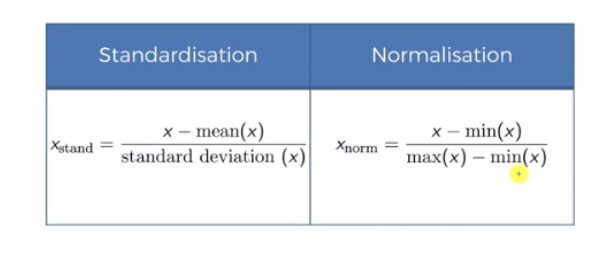

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import numpy as np
img=np.array(Image.open('../input/feature-scaling/Normalization.PNG'))
fig=plt.figure(figsize=(10,10))
plt.imshow(img,interpolation='bilinear')
plt.axis('off')
plt.show()

We can used Feature scaling Method like Standardisation and Normalization on our Dataset.For RNN we prefer Normalization as it work well if Sigmoid function is used for activation in the output layer

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [8]:
training_set_scaled.shape

(1259, 1)

Now we have the stock prices in ranged of 0 to 1 due to scaling.

**Creating a data Structure with 60 timesteps and one output **

We will be taking the reference of past 60 days of data to predict the future stock price.It is observed that taking 60 days of past data gives us best results.In this data set 60 days of data means 3 months of data.Every month as 20 days of Stock price. X train will have data of 60 days prior to our date and y train will have data of one day after our date

In [9]:
X_train=[]
y_train=[]
for i in range(60,1259):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0]) 
X_train,y_train=np.array(X_train),np.array(y_train)

**Reshaping the data**

In [10]:
X_train.shape[0]

1199

In [11]:
X_train.shape[1]

60

In [12]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [13]:
X_train.shape

(1199, 60, 1)

Now we have the right shape for our data in three dimensons.

1-Number of stock prices -1199

2-Number of time steps -60

3.Number of Indicator -1

**Part2:Building the RNN** 

**Importing the Keras packages**

In [14]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


**Initalize RNN **

In [15]:
regressor=Sequential()

* **Adding the first LSTM Layer and Dropout regularization**

In [16]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

**Adding second layer of LSTM and dropout regularization**

In [17]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

> **Adding third layer of LSTM and dropout regularization**

In [18]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

**Adding third layer of LSTM and dropout regularization**

In [19]:
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

**Adding the output Layer **

In [20]:
regressor.add(Dense(units=1))

**Compiling the RNN**

In [21]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

> **Fitting the RNN to training set**

In [22]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0318
Epoch 2/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 3/100
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0038
Epoch 4/100
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0039
Epoch 5/100
1199/1199 [==============================] - 5s 5ms/step - loss: 0.0037
Epoch 6/100
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0036
Epoch 7/100
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0034
Epoch 8/100
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0033
Epoch 9/100
1199/1199 [==============================] - 5s 5ms/step - loss: 0.0036
Epoch 10/100
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0035
Epoch 11/100
1199/1199 [==============================] - 5s 5ms/step - loss: 0.0039
Epoch 12/100
1199/1199 [==============================] - 5s 5ms/step - lo

**Part3:Making Predictions and Making Visulization**

Getting the real stock price of 2017

In [23]:
dataset_test=pd.read_csv('../input/google-test/Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [24]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [25]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [26]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test =np.array(X_test)

In [27]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [28]:
predicted_stock_price.shape

(20, 1)

In [29]:
real_stock_price.shape

(20, 1)

**Visualizing the results**

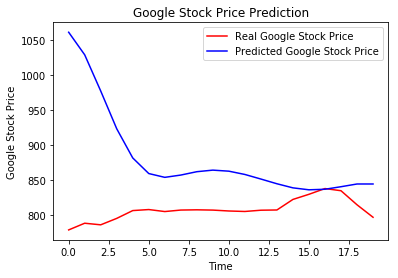

In [30]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()